# Macroeconomics III: Problem Set 1

Student: Rafael F. Bressan

# 1 No Economics

## 1. **Solving Nonlinear Equations - Bisection Method.** Consider the function:

$$b(x) = e^x − e^{2.2087}$$

Starting from the interval $x \in [0, 4]$, find $x^∗$ such that $b(x^∗) = 0$ using the bisection method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)  #set default figure size
from scipy import interpolate
%matplotlib inline

In [2]:
def f(x):
    return np.exp(x) - np.exp(2.2087)

In [3]:
def bisection(func, a, b, tol = 1e-8):
    if func(a)*func(b)>0:
        print('Conditions for the Intermidiate Value Theorem do not hold')
    else:
        # First middle point
        c = (a+b)/2
        error = abs(func(c))
        # ~ print(error) 
        # bisection loop
        while error > tol:
            if func(c)*func(a) < 0:
                b = c
            else:
                a = c
            c = (a+b)/2
            error = abs(func(c))
            # ~ print(error)

    return c

In [4]:
root = bisection(f, 0, 4)
print(f"Root of the function: {root}.")

Root of the function: 2.2086999993771315.


## 2. **Solving Nonlinear Equations - Newton’s Method.** Consider the function:
$$d(x) = x^{−5} − x^{−3} − c.$$

(a) Set $c = 1$ and plot $d$ on $x \in [0.6, 10]$. Find $x^∗$ such that $d(x^∗) = 0$ using Newton’s
method.


In [5]:
def d(x, c):
    return x**(-5)-x**(-3)-c

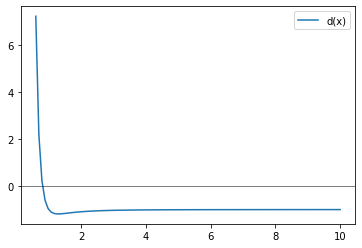

In [6]:

xg=np.linspace(0.6, 10, 100)
fig, ax = plt.subplots()
ax.plot(xg, d(xg, 1), label = "d(x)")
ax.axhline(y=0, color='black', lw=0.5)
ax.legend()

In [7]:
def newton(x0, f, J, tol=1e-8, maxit=100):
    error = abs(f(x0))
    xs = x0
    i = 0
    while error > tol:
        xs1 = xs - f(xs)/(J(xs) + tol)
        #Somamos um numero pequeno para evitar que haja divisões por zero
        error = abs(f(xs1))
        xs = xs1
        i += 1
        if i == maxit:
            warning = 'The algorithm did not converge in the first ' + str(maxit) + ' iterations.'
            return warning
            break
    return xs1

In [8]:

# Define the Jacobian (derivative)
def dd(x):
    return -5*x**(-6)+3*x**(-4)

# Encapsulate the value of c=1
def d1(x):
    return d(x, 1)

In [9]:
root=newton(0.65, d1, dd)
print(f"Root of the function: {root}.")

Root of the function: 0.808730600479392.



(b) Now construct an equidistant grid for $c$ containing 10 nodes between 1 and 10,
and for each value of c on the grid find $x^∗$.

In [10]:
c=np.linspace(1, 10, 10)
root=np.zeros(10)
for i in range(len(c)):
    def dc(x):
        return d(x, c[i])
    
    root[i]=newton(0.8, dc, dd)
    print(f"Root for c={c[i]}: {root[i]}")

Root for c=1.0: 0.8087306004782296
Root for c=2.0: 0.7419124700395855
Root for c=3.0: 0.7011546384334304
Root for c=4.0: 0.6720474338673877
Root for c=5.0: 0.6495404164547445
Root for c=6.0: 0.6312716818829904
Root for c=7.0: 0.6159478006833599
Root for c=8.0: 0.6027847151489539
Root for c=9.0: 0.5912719407313949
Root for c=10.0: 0.5810589510998727



(c) Construct a new equidistant grid for $c$ containing 1000 nodes between 1 and 10,
and plot your solution for each value on this grid using a spline.

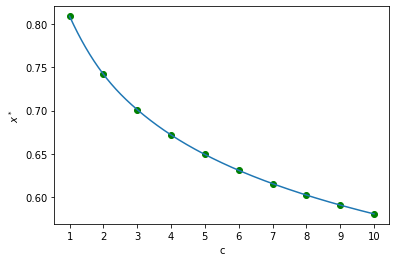

In [11]:

# B-Spline cubic
# could use interpolate.iterp1d
sp=interpolate.splrep(c, root)
fine_c=np.linspace(1, 10, 1000)
sp_fine=interpolate.splev(fine_c, sp)

fig, ax = plt.subplots()
ax.scatter(c, root, c='green')
ax.plot(fine_c, sp_fine)
ax.set_xlabel('c')
ax.set_ylabel('$x^*$')
ax.set_xticks(c)

(d) Relabel your solution $x^∗$ from part (b) $x(c)$. Find the inverse function $c(x)$,
and plot it on an equidistant grid of 1000 nodes on $x \in [0.6, 10]$ using a spline
approximation.

Text(0, 0.5, 'c')

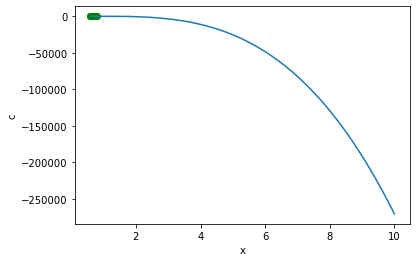

In [12]:
# Invert the interpolation
spc = interpolate.splrep(sorted(root), list(reversed(c)), s = 0)
fine_x=np.linspace(0.6, 10, 1000)
# B-Spline cubic
spc_fine=interpolate.splev(fine_x, spc)

fig, ax = plt.subplots()
ax.scatter(root, c, color='green')
ax.plot(fine_x, spc_fine)
ax.set_xlabel('x')
ax.set_ylabel('c')


(e) Now find the solution to:
0 = c(x) + x.

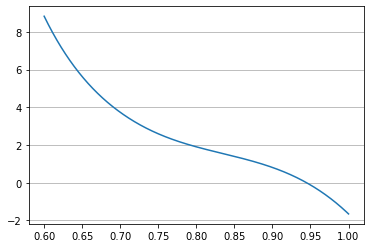

In [13]:
# Let g(x) := c(x) + x
g = c + root # Numerical points for g(x)
# plt.scatter(root, g)
# Interpolate it over a very fine grid
spg = interpolate.splrep(sorted(root), list(reversed(g)), s = 0)
fine_x2 = np.arange(0.6, 1, 1e-6)
spg_fine = interpolate.splev(fine_x2, spg)
plt.plot(fine_x2, spg_fine)
plt.grid(axis='y')

In [14]:
# roots = np.array([])
g_min = abs(spg_fine).argmin() # Index for the min abs(g(x))
# If the minimum value of abs(g(x)) is close enough to zero then x is the root
if spg_fine[g_min] < 1e-4:
    g_root = fine_x2[g_min]
    print(f"The root for g(x) is: {g_root}")
else:
    print("g(x) has no root in the interval")

The root for g(x) is: 0.944836000009916


In [15]:
# We could also implement a modified bisection method!
def m_bisection(func, tol = 1e-4, maxit = 100):
    i = 0
    j = len(func) - 1
    itr = 0

    if func[i]*func[j] > 0:
        print('Conditions for the Intermidiate Value Theorem do not hold')
    else:
        # First middle point
        k = (i+j)//2 # floor division to avoid floating points
        error = abs(func[k])
        # bisection loop
        while error > tol:
            if func[k]*func[i] < 0:
                j = k
            else:
                i = k
            itr +=1
            # print(f"Iteration {itr}: {i}, {j}, {k}")
            if itr >= maxit:
                break
            k = (i+j)//2
            error = abs(func[k])
            # ~ print(error)
    return k

In [16]:
kg = m_bisection(spg_fine)
print(f"The root for g(x) is: {fine_x2[kg]}")

The root for g(x) is: 0.9448350000099159


## 3. **Approximation Methods: Finite Element Methods.** Consider the function $h(x)$ on the domain $x \in[-2,2]$ :
$$
h(x)=\left\{\begin{array}{lc}
(x-0.5)^{2} & \text { for } 0 \leq x \leq 2 \\
(x+0.5)^{2} & \text { for }-2 \leq x<0
\end{array}\right.
$$

(a) Approximate $h(x)$ with a cubic spline, using $n=5$ equally spaced nodes. Plot the function along with your approximation and calculate the root mean squared error of your approximation over the fine grid, with interval $0.0001$.

In [17]:
def h_scalar(x):
    if x >= -2 and x < 0:
        return (x+0.5)**2
    elif x >= 0 and x <= 2:
        return (x-0.5)**2
    else:
        return np.nan

# Vectorize the function
h=np.vectorize(h_scalar)

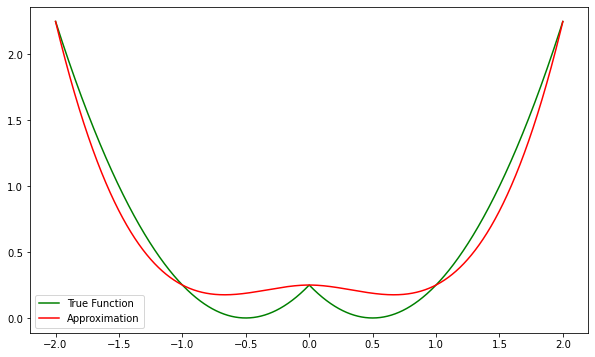

In [18]:
n=np.linspace(-2, 2, 5)
x=np.arange(-2, 2, 0.0001)
# B-Spline cubic
sp=interpolate.splrep(n, h(n))
sp_eval=interpolate.splev(x, sp)
# Plot the functions
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(x, h(x), color='green', label='True Function')
ax.plot(x, sp_eval, color='red', label='Approximation')
ax.legend()

The **root mean squared error** (RMSE) is computed as follows:
$$
RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - y_i)^2}
$$

for two vectors $x$ and $y$.

In [19]:
def rmse(x, y):
    return np.sqrt(np.mean((x-y)**2))

rmserr=rmse(h(x), sp_eval)
print(f"The RMSE is: {rmserr}")

The RMSE is: 0.13801311186847837



(b) Approximate $h(x)$ with a cubic spline, using $n=10$ equally spaced nodes. Plot this new approximation along with both the actual function and your approximation from (a) and calculate the root mean squared error of your approximation over the fine grid, with interval $0.0001$. Explain the reasons for the differences in your answers.

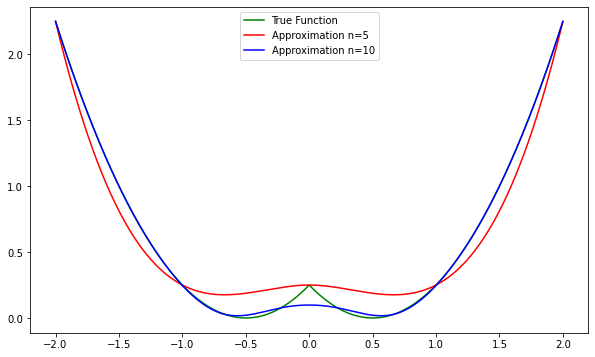

In [20]:
n10=np.linspace(-2, 2, 10)
# B-Spline cubic
sp10=interpolate.splrep(n10, h(n10))
sp10_eval=interpolate.splev(x, sp10)
# Plot the functions
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(x, h(x), color='green', label='True Function')
ax.plot(x, sp_eval, color='red', label='Approximation n=5')
ax.plot(x, sp10_eval, color='blue', label='Approximation n=10')
ax.legend()

In [21]:
rmserr10=rmse(h(x), sp10_eval)
print(f"The RMSE is: {rmserr10}")

The RMSE is: 0.027642024417801263


The higher the number of nodes, more reference knots we have to compute the spline approximation. These knots (they are at the true function value) limit the range the approximation can differ from the true function, thus, improving the results. 


## 4. In this question, you will use a Monte Carlo procedure to estimate the value of $\pi$. Pick a square with a perimeter of $8 r$ and inscribe a circumference with a $2 r$ diameter on it. We are able to estimate $\pi$ by randomly drawing points inside the square and counting how many of them lie inside the circle.[^1]

[^1]: To visualise the method, you can check this YouTube video [https://www.youtube.com/watch?v=ELetCV_wX_c](https://www.youtube.com/watch?v=ELetCV_wX_c).

(a) Describe in detail the algorithm you intend to use to estimate $\pi$.

I will anchor the bottom-left corner of the square at the origin, such that the square is the cartesian product $(0, 2r)\times(0, 2r)$. The circle will be centered at $(r, r)$ and will have radius $r$.

Then I will randomly draw two independent sequences $x, y \in [0, 2r]$ to form the square point $(x, y)$. This point will lie inside the circle if its distance to the circle's center, $(r, r)$, is lower than or equal to $r$. The proportion of points inside the circle will approximate the ratio of areas between the circle and the square, $R=\frac{\pi r^2}{4 r^2}=\pi/4$. Therefore, my approximation to $\pi$ will be: $\pi\approx 4R$.


(b) Plot the square, the inscribed circumference and a random draw of 100 points. What is the value of your estimated $\pi$ with this 100 points.

In [22]:

class pi_approx():
    
    def __init__(self, radius=1, n_points=100, seed=1234) -> None:
        self.r = radius
        self.n = n_points
        self.seed = seed
        self.pi = np.nan
        self.x = np.zeros(n_points)
        self.y = np.zeros(n_points)
    
    def approximate(self):
        # set seed
        rng=np.random.default_rng(self.seed)
        self.x=rng.uniform(0, 2*self.r, self.n)
        self.y=rng.uniform(0, 2*self.r, self.n)
        point=np.array(list(zip(self.x, self.y)))
        center=np.array((self.r, self.r))
        # Euclidean distance of points from center
        dist=np.linalg.norm(point-center, axis=1)
        self.pi=4*np.sum(np.less_equal(dist, self.r))/self.n
        # print(f"Approximate Pi: {self.pi}")
    
    def get_pi(self):
        return self.pi
    
    def plot(self):
        fig,ax=plt.subplots(figsize=(10,6))
        ax.hlines(y=0, xmin=0, xmax=2*self.r)
        ax.hlines(y=2*self.r, xmin=0, xmax=2*self.r)
        ax.vlines(x=0, ymin=0, ymax=2*self.r)
        ax.vlines(x=2*self.r, ymin=0, ymax=2*self.r)
        theta=np.linspace(0, 2*np.pi, 200)
        xc=self.r+self.r*np.cos(theta)
        yc=self.r+self.r*np.sin(theta)
        ax.plot(xc, yc, color='green')
        ax.scatter(self.x, self.y, color='black')
        ax.set_aspect(1)
        ax.set_title(f"{self.n} points randomly drawn")

In [23]:
pi_ap = pi_approx()
pi_ap.approximate()
print(f"Approximate Pi: {pi_ap.get_pi()}")

Approximate Pi: 2.96


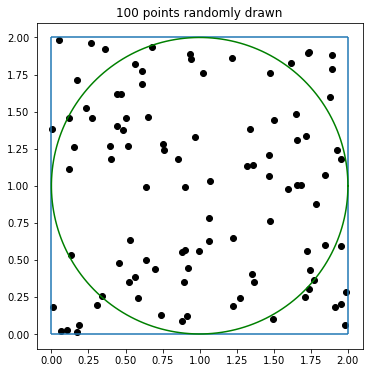

In [24]:
pi_ap.plot()



(c) Replicate your algorithm 20 times, using different amounts of random draws $(n=5000,10000,15000, \ldots, 100000)$. Plot the estimates of $\pi$ in the vertical axis as a function of the number of random draws $(n)$ in the horizontal axis.

In [25]:
def pi_d(n_points):
    pid = pi_approx(n_points=n_points)
    pid.approximate()
    return pid.get_pi()

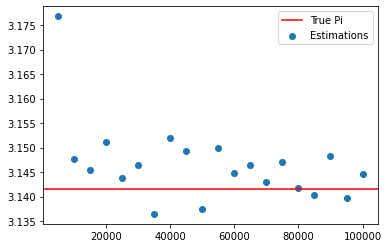

In [26]:
points = np.arange(5000, 100001, 5000)
pi_f = np.vectorize(pi_d)
pi_vec = pi_f(points)
# Plot
plt.scatter(points, pi_vec, label = 'Estimations')
plt.axhline(np.pi, color='red', label = 'True Pi')
plt.legend()

# 2 Economics

## 5. **Two-period model.** Consider the following two-period $(t=0,1)$ standard model economy. There is a continuum of agents of measure $1 .$ Each agent is endowed with one unit of time in each period, which can be used for leisure $l$ or hours worked $h$. Preferences are over consumption $c$ and leisure $l$ and are represented by
$$
U=\sum_{t=0}^{1} \beta^{t}\left(u\left(c_{t}\right)+\gamma v\left(l_{t}\right)\right), \gamma>0 \text { and } \beta \in(0,1)
$$
and $u(c)=\frac{c^{1-\sigma}-1}{1-\sigma}$ and $v(l)=\frac{l^{1-\sigma}-1}{1-\sigma}$ with $\sigma>0 .$ On the production side, there is a continuum of firms of measure one, each with access to a technology to produce the consumption good:
$$
Y_{t}=A_{t} L_{t}^{\alpha}, A_{t}>0 \text { and } \alpha \in(0,1)
$$
where $Y_{t}$ is output, $L_{t}$ denotes labor input and $A_{t}$ is a productivity factor. Each household is entitled to an equal share of dividends of the firms. Suppose that there is an asset market that agents can trade one-period bonds, such that budget constraints can be written as (I should not have written them because this is part of an exercise of thinking about writing your own economy)
$$
c_{0}+a_{1}=w_{0} h_{0}+\pi_{0}
$$
and
$$
c_{1}=w_{1} h_{1}+(1+r) a_{1}+\pi_{1}
$$
$\pi_{t} \mathrm{~s}$ are profits and they are taken as given by households. Carefully address the following questions.

(a) Define a competitive equilibrium for this economy. Be precise about the problem of each agent, each firm and market clearing conditions.

There are three requirements for a competitive equilibrium, corresponding to: 1) households maximize utility; 2) firms maximize their profit; and that “markets clear” at the equilibrium price. 

1. Households Problem

$$
\begin{align*}
    \max_{c_0,c_1,h_0,h_1,a_1}&U = u(c_0) + \gamma v(1-h_0) + \beta u(c_1) + \beta \gamma v(1-h_1)\tag{HP}\\
    s.t\quad &c_0+a_1 = w_0h_0+\pi_0\\
    &c_1 = w_1h_1+\pi_1+(1+r)a_1\\
    &l_0+h_0=1\\
    &l_1+h_1=1
\end{align*} 
$$

2. Firms Problem

$$
\begin{align*}
    \max_{L_t}\quad &\pi_t = p_tA_tL_t^\alpha - w_tL_t\quad t=\{0,1\}\tag{FP}
\end{align*}
$$

3. Market Clearing

Total consumption plus savings must equal total production plus interest at a given period

3.1 $c_0+a_1=Y_0$

3.2 $c_1=(1+r)a_1+Y_1$

and labor supply matches demand

3.3 $h_t=L_t$

where $c_t$ denotes consumption at period $t$ from all households, which has a measure of 1 and $Y_t$ denotes total production of the final good from firms, which also has a measure of 1.

(b) Derive the first-order conditions of the problem of each agent and each firm and go as far as possible in writing the market clearing equilibrium conditions.

The First Order Conditions for HP is:
$$
\begin{align*}
    &\mathcal{L} = u(c_0) + \gamma v(1-h_0) + \beta u(c_1) + \beta\gamma v(1-h_1) + \lambda_0 [w_0 h_0 + \pi_0 - c_0 - a_1] + \lambda_1[w_1 h_1 + \pi_1 + (1+r)a_1 - c_1]\\
    &c_0: u'(c_0) - \lambda_0 = 0\\
    &c_1: \beta u'(c_1) - \lambda_1= 0\\
    &h_0: -\gamma v'(1-h_0) + \lambda_0 w_0 = 0\\
    &h_1: -\beta\gamma v'(1-h_1) + \lambda_1 w_1 = 0\\
    &a_1: -\lambda_0 + \lambda_1(1+r) = 0
\end{align*}
$$

Solving those equations we arrive at the Euler equation and the intertemporal labor supply substitution that characterizes the problem.

$$
\begin{equation}
\left. \begin{aligned}
u'(c_0)=\gamma\frac{v'(1-h_0)}{w_0}\\
u'(c_1)=\gamma\frac{v'(1-h_1)}{w_1}
\end{aligned}
\right\rbrace \implies u'(c_0)=\beta(1+r)u'(c_1)\qquad\text{Euler equation}
\end{equation}
$$

$$
\begin{equation}
v'(1-h_0) w_1 = \beta(1+r) v'(1-h_1)w_0 \qquad\text{intertemporal labor supply substitution}
\end{equation}
$$

This system could be solved by writing all endogenous variables, $c_1$, $h_0$, $h_1$ and $a_1$ in terms of $c_0$, then using the first constraint equation, $c_0=w_0h_0+\pi_0-a_1$ we can find $c_0(\beta, r, w_0, w_1)$ and recursively substitute to find all other endogenous variables.

The First Order Condition for FP is:

$$
\begin{equation}
\frac{w_t}{p_t} = \alpha A_t L_t^{\alpha-1}  \quad t=\{0,1\}
\end{equation}
$$

Here we can see the FP is static and we are assuming firms are price takers at any given period. Moreover, since there is only one good in this economy it will be the numeraire, hence $p_t=1, \forall t$. Therefore, real wages are given by the marginal productivity of labor.

Finally, market clearing implies:
$$
\begin{align}
    &h_t=L_t\\
    &c_0+a_1=A_0 L_0^\alpha\\
    &c_1=(1+r)a_1 + A_1 L_1^\alpha\\
\end{align}
$$

(c) Now, let $A_{0}=1, A_{1}=1, \alpha=2 / 3, \sigma=2, \beta=0.98^{25}$ (subjective discount rate of $2 \%$ per year, but a model period is 25 years) and $\gamma=1 .$ Find all allocations (consumption, labor, leisure and assets) and prices $\left(w_{0}, w_{1}\right.$ and $\left.r\right)$ for this economy. You probably need to do this numerically - explain how you did it.

I started by setting up all equations from (1) to (6) in a total of 9 non-linear equations the equilibrium must satisfy. I treated the **interest rate, $r$, as exogenous**, thus, I have 9 endogenous variables and the same number of equations to solve the system. The endogenous variables are: $c_0, c_1, h_0, h_1, a_1, w_0, w_1, \pi_0, \pi_1$, while the exogenous parameters are: $\alpha, \beta, \gamma, \sigma, r, A_0, A_1$.

The 9 equations the economy must satisfy are:

$$
\begin{align}
c_0&=w_0h_0+\pi_0-a_1\\
c_1&=[(1+r)\beta]^{1/\sigma}c_0\\
h_0&=1-(\gamma/w_0)^{1/\sigma}c_0\\
h_1&=1-(\gamma/w_1)^{1/\sigma}c_1\\
a1&=(c1-w_1h_1-\pi_1)/(1+r)\\
w_0&=\alpha A_0 h_0^{\alpha-1}\\
w_1&=\alpha A_1 h_1^{\alpha-1}\\
\pi_0&=(1-\alpha)A_0h_0^\alpha\\
\pi_1&=(1-\alpha)A_1h_1^\alpha
\end{align}
$$

In [27]:
from scipy.optimize import root

In [28]:
class twop_economy():
    
    def __init__(self, A0, A1, alpha, sigma, beta, gamma, r, tol=1e-4) -> None:
        self.A0, self.A1, self.alpha, self.sigma, self.beta, self.gamma, self.r = A0, A1, alpha, sigma, beta, gamma, r
        self.tol = tol
        self.eq = None # Equilibrium values
    
    def u(self, c):
        return (c**(1-self.sigma)-1)/(1-self.sigma)
    
    def v(self, l):
        return (l**(1-self.sigma)-1)/(1-self.sigma)
    
    def du(self, c):
        return c**(-self.sigma)
    
    def dv(self, l):
        return l**(-self.sigma)
    
    def solve_ss(self, x0) -> None:
        
        def obj_fun(x):
            F = np.empty(9)
            c0, c1, h0, h1, a1, w0, w1, pi0, pi1 = x
            # Solving the system of nonlinear equations
            F = np.array([
                        #################################################
                        # Using one equation for each endogenous variable
                        c0 - (w0*h0+pi0-a1),
                        c1 - (((1+self.r)*self.beta)**(1/self.sigma)*c0),
                        h0 - (1-(self.gamma/w0)**(1/self.sigma)*c0),
                        h1 - (1-(self.gamma/w1)**(1/self.sigma)*c1),
                        a1 - (c1-w1*h1-pi1)/(1+self.r),
                        w0 - (self.alpha*self.A0*(h0)**(self.alpha-1)),
                        w1 - (self.alpha*self.A1*(h1)**(self.alpha-1)),
                        pi0 - ((1-self.alpha)*self.A0*(h0)**self.alpha),
                        pi1 - ((1-self.alpha)*self.A1*(h1)**self.alpha)
                        ])
            return F
        
        self.eq = root(obj_fun, x0, method='hybr')
    
    def check_constraints(self) -> None:
        c0, c1, h0, h1, a1, w0, w1, pi0, pi1 = self.eq.x
        print("Checking Equilibrium!")
        print(f"Euler equation: {abs(self.du(c0)-(1+self.r)*self.beta*self.du(c1)) < self.tol}")
        print(f"Budget constraint t0: {abs(c0+a1-w0*h0-pi0 < self.tol)}")
        print(f"Budget constraint t1: {abs(c1-w1*h1-(1+self.r)*a1 - pi1 < self.tol)}")

In [29]:
parameters = {'A0':1, 'A1':1, 'alpha': 2/3, 'sigma': 2, 'beta': 0.98**25, 'gamma': 1, 'r': 1.05**25-1}
econ = twop_economy(**parameters)
# Order for x0: c0, c1, h0, h1, a1, w0, w1, pi0, pi1
x0 = np.array([0.5, 0.9, 0.5, 0.5, 0.2, 0.9, 0.9, 0.5, 0.5])
x0a = np.array([0.5, 0.9, 0.3, 0.6, 0.1, 0.3, 0.6, 0.35, 0.25])
econ.solve_ss(x0)
print(f"Root finding successfull? {econ.eq.success}")
result = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econ.eq.x))
print("\n")
print(result)
# Checking constraints
econ.check_constraints()
# New initial guess
econ.solve_ss(x0a)
resulta = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econ.eq.x))
print("\n")
print(resulta)
# Checking constraints
econ.check_constraints()

Root finding successfull? True


{'c0': 0.506067279610891, 'c1': 0.7234365436457177, 'h0': 0.456192445867716, 'h1': 0.2823523037514032, 'a1': 0.08653783165675656, 'w0': 0.8660162564198662, 'w1': 1.0161979061983475, 'pi0': 0.19753503708937253, 'pi1': 0.14346290994987504}
Checking Equilibrium!
Euler equation: True
Budget constraint t0: True
Budget constraint t1: True


{'c0': 0.506067279611864, 'c1': 0.7234365436471085, 'h0': 0.45619244586792357, 'h1': 0.2823523037582958, 'a1': 0.08653783165630807, 'w0': 0.8660162564220163, 'w1': 1.0161979062326345, 'pi0': 0.19753503708916603, 'pi1': 0.14346290994832034}
Checking Equilibrium!
Euler equation: True
Budget constraint t0: True
Budget constraint t1: True


(d) Let $A_{0}$ decrease from 1 to $0.90$ and keep the value of all other parameters as before. Redo all your calculations and comment on your results.

In [30]:
parameters["A0"] = 0.9
econd = twop_economy(**parameters)
econd.solve_ss(x0)
resultd = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econd.eq.x))
print(resultd)

{'c0': 0.474224150763333, 'c1': 0.67791594984235, 'h0': 0.46175848762507804, 'h1': 0.31509724168732817, 'a1': 0.06344992939885682, 'w0': 0.7762702719270494, 'w1': 0.979701726926152, 'pi0': 0.1792246933729288, 'pi1': 0.1543506560384243}


The wage in $t=0$ drops, since productivity is lower. This in turn raises the labor supply in order to compensate consumption, although it does not compensate completely. Savings are also reduced. In period $t=1$, wage and consumption are reduced, eventhough labor supply and profit are higher.

(e) Let $A_1$ decrease from 1 to 0.90 and keep the value of all other parameters as before. Redo all your calculations and comment on your results.

In [31]:
parameters["A1"] = 0.9
econe = twop_economy(**parameters)
econe.solve_ss(x0)
resulte = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econe.eq.x))
print(resulte)

{'c0': 0.4657706284083068, 'c1': 0.66583141634148, 'h0': 0.46982508719536503, 'h1': 0.2976274984139922, 'a1': 0.07814722160038945, 'w0': 0.7718019106748815, 'w1': 0.8986561799566345, 'pi0': 0.18130594998734584, 'pi1': 0.1337323956088097}


The reduction in productivity has similar results as before, but now the effects are more pronounced in period $t=1$. 

(f) Now, let $\sigma = 1.5$ and then redo (c)-(e). Comment on your results.

In [32]:
parameters = {'A0':1, 'A1':1, 'alpha': 2/3, 'sigma': 1.5, 'beta': 0.98**25, 'gamma': 1, 'r': 1.03**25-1}
# c
econfc = twop_economy(**parameters)
econfc.solve_ss(x0)
resultfc = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econfc.eq.x))
# d
parameters["A0"] = 0.9
econfd = twop_economy(**parameters)
econfd.solve_ss(x0)
resultfd = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econfd.eq.x))
# e
parameters["A1"] = 0.9
econfe = twop_economy(**parameters)
econfe.solve_ss(x0)
resultfe = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "pi0", "pi1"], econfe.eq.x))

print(f"Economy from item c: {resultfc}\n")
print(f"Economy from item d: {resultfd}\n")
print(f"Economy from item e: {resultfe}\n")

Economy from item c: {'c0': 0.5223630142201323, 'c1': 0.6105118423336031, 'h0': 0.4319851777362112, 'h1': 0.36178588747467305, 'a1': 0.049088292757422526, 'w0': 0.8818995596883255, 'w1': 0.9356028449740188, 'pi0': 0.19048376900807693, 'pi1': 0.1692439527346876}

Economy from item d: {'c0': 0.49147299451797594, 'c1': 0.5744091276989537, 'h0': 0.4278970127816884, 'h1': 0.3895714207825455, 'a1': 0.0195832265452992, 'w0': 0.7962293195750588, 'w1': 0.9128085749601483, 'pi0': 0.17035207362632498, 'pi1': 0.1778020667167257}

Economy from item e: {'c0': 0.47707639856966483, 'c1': 0.5575831042699062, 'h0': 0.44093809173694515, 'h1': 0.3711436548380099, 'a1': 0.04431146963964398, 'w0': 0.7883009397870662, 'w1': 0.8349053362876996, 'pi0': 0.17379595604174636, 'pi1': 0.15493490906125088}



Now we have increased the risk aversion of consumption (and leisure), thus our agent now prefers a higher level of consumption smoothness. This fact can be seen in our results since the difference in consumptions are much lower now.

## 6. **Growth Model.** Consider the following growth model with taxes.
Households. There is a continuum of identical households with measure one. Each household has $N_{t}$ members, which grows at rate $\eta$. The representative household owns the initial capital stock, $k_{0}$, and each household member has a unit of productive time in each period. Let $h_{t}$ and $l_{t}$ be hours worked and leisure by each household member, respectively, such that $h_{t}+l_{t}=1$. Preferences of the representative household is given by the following utility function:
$$
U=\sum_{t=0}^{\infty} \beta^{t} N_{t}\left[\ln \left(c_{t}\right)+\theta \ln \left(l_{t}\right)\right]
$$
The evolution of capital stock is:
$$
k_{t+1}=(1-\delta) k_{t}+x_{t}, \delta \in(0,1)
$$
where $x_{t}$ is investment at $t$.
(Important: Note the difference between the household and a household member You can think about this as a dynasty such that there is perfect altruism towards future generations) Production Sector. There is a continuum of measure one of identical firms. Let $A_{t}$ be a productivity factor which evolves according to $A_{t+1}=(1+\gamma) A_{t} .$ Let $K_{t}$ be the capital stock, and $H_{t}$ be the total hours employed in the production of good $Y_{t}$ by the representative firm. The technology is given by
$$
Y_{t}=K_{t}^{\alpha}\left(A_{t} H_{t}\right)^{1-\alpha}
$$
The representative firm rents capital and labor from households.
Government Sector. There is a government which finances $G_{t}$ expenditures through taxes on consumption, $\tau^{c}$, labor income, $\tau^{h}$, and capital income, $\tau^{k}$. Suppose that in every period the government balances its budget, such that
$$
G_{t}=\tau^{c} N_{t} c_{t}+\tau^{h} w_{t} N_{t} h_{t}+\tau^{k} r_{t} k_{t}
$$
Resource Constraint:
$$
Y_{t}=N_{t} c_{t}+x_{t}+G_{t}
$$
(Comment: Think about a continuous measure one of households. This implies that each household is very tiny. Since they are identical, this implies that you can solve the problem of a household who represents the others. Finally, the average of the economy is similar to the aggregate)

(a) Define a competitive equilibrium for this economy and write down the equations that describe the equilibrium of the system. (This is the most important part of the problem. You can look at your macro text book)


The household's problem, after some rearrangement, will be:
$$
    \begin{align*}
        \max_{\{c_t,h_t,k_{t+1}\}_{t=0}^\infty}\quad &U=\sum_{t=0}^{\infty}\beta^{t}N_t[ln(c_t) + \theta ln(l_t)]\tag{HP}\\
        s.t.\quad & (1+\tau^c)c_tN_t+k_{t+1}=(1-\delta)k_t+(1-\tau^h)N_t w_t h_t+(1-\tau^k)r_t k_t
    \end{align*}
$$

which yield the following first order conditions:
$$
\begin{align*}
        (c_t):&\frac{1}{c_t} = \lambda_t(1+\tau^c)\\
        (l_t):& \theta\frac{1}{1-h_t} = \lambda_t(1-\tau^h)w_t\\
        (k_{t+1}):& \lambda_t = \lambda_{t+1}\beta\left[(1-\tau^k)r_{t+1} + (1-\delta)\right]
\end{align*}
$$

Which yield the equations:

$$
\begin{align}
\frac{c_{t+1}}{c_t}&=\beta\left[(1-\delta)+(1-\tau^k)r_{t+1} \right]\qquad&\text{Euler equation}\\
(1-h_{t})&=\frac{\theta(1+\tau^c)}{(1-\tau^h)}\frac{c_t}{w_t}\qquad&\text{labor-leisure tradeoff}\\
k_{t+1}&=\left[(1-\delta)+(1-\tau^k)r_t \right]k_t+(1-\tau^h)N_t h_t w_t -(1+\tau^c)N_t c_t
\end{align}
$$

The firm's problem is:

$$
\begin{align*}
        \max_{K_t,H_t}\quad&\Pi_t = K_{t}^{\alpha}(A_tH_t)^{1-\alpha} - w_tH_t - r_tK_t\tag{FP}\\
    \end{align*}
$$

and the FOC are:

$$
\begin{align}
    (H_t): &w_t = (1-\alpha)K_t^\alpha (A_tH_t)^{-\alpha}A_t\\
    (K_t): &r_t = \alpha K_t^{\alpha -1}(A_tH_t)^{1-\alpha}
\end{align}
$$

which combined result in the famigerated **zero-profit condition** of competitive markets with constant returns to scale production function.

$$w_t H_t + r_t K_t = Y_t \implies \Pi_t=0$$

While the market clearing conditions are:

$$
\begin{align*}
        &Y_t = k_{t+1} -(1-\delta)k_t + (1+\tau^{c}) N_{t} c_{t}+\tau^{h} w_{t} N_{t} h_{t}+\tau^{k} r_{t} k_{t}\\
        &K_t=k_t\\
        &H_t=h_tN_t
    \end{align*}
$$

(b) What are the variables growth rate along the balanced growth path equilibrium? (hint: Assume that taxes are constant and that $G$ grows at the same rate of $Y$ such that the "government size", $G / Y$, is also constant.)

The literature uses the term “balanced growth path” to denote a situation where all endogenous variables grow at constant (but possibly different) rates. From HP foc's (1) and (3) we have that $c_{t+1}/c_t=\beta\left[(1-\tau^k)r_{t+1}+(1-\delta)\right]$, so in the balanced growth path $r_t$ must be constant. But the interest rate is determined from FP:

$$
\begin{align*}
r_t &= \alpha K_t^{\alpha -1}(A_tH_t)^{1-\alpha}\\
&=\alpha\left(\frac{K_t}{A_t H_t}\right)^{\alpha-1}\\
&=\alpha\tilde{k}_t^{\alpha-1}
\end{align*}
$$

Therefore, in the balanced growth path $r_t$ is constant and this implies $K_t$ and $A_t H_t$ grow at the same rate. Since $A_tH_t$ grow at rates exogenously given, $(1+\gamma)(1+\eta)$ this is the growth rate of $K_t$. Moreover, redefining the production function as $\tilde{y}_t:=\tilde{k}_t^{\alpha}$, zero growth for $\tilde{k}_t$ implies $Y_t$ also grows at $(1+\gamma)(1+\eta)$ rate.

Capital motion can be written as: $K_{t+1}=(1-\delta)K_t+x_t$ giving result to $x_t/K_t = (1+\gamma)(1+\eta)-(1-\delta)$ and x_t must also grows at rate $(1+\gamma)(1+\eta)$. Now we are left to uncover the individual consumption growth rate. Notice the investment is given by:

$$
\begin{align*}
x_t &= Y_t - N_tc_t-G_t\\
\frac{x_t}{Y_t} &= 1-N_tc_t - \frac{G_t}{Y_t} 
\end{align*}
$$

but since both $x_t$ and $Y_t$ grow at the same rate, their ratio is constant and so should be the term $N_tc_t/Y_t$ which finally implies $c_t$ grows at rate $1+\gamma$.

Hence our results are: capital stock, output and (level of) investment grow at rates $(1+\gamma)(1+\eta)$ (technology plus population), while individual consumption grows at technology rate.

(c) Write down the equivalent stationary system. (You have to transform your variable such that they are stationary in the long-run)

We chose the following transformations: 

$$
\begin{align*}
\tilde{k}_t &:= \frac{K_t}{A_t H_t}\\
\tilde{c}_t &:= \frac{c_t}{A_t}\\
\tilde{w}_t &:= \frac{w_t}{A_t}
\end{align*}
$$

then our five equations to solve the system can be rewritten as:

$$
\begin{align}
\frac{\tilde{c}_{t+1}}{\tilde{c}_t}&=\frac{\beta}{1+\gamma}\left[(1-\delta)+(1-\tau^k)r_{t+1} \right]\\
(1-h_{t})&=\frac{\theta (1+\tau^c)}{(1-\tau^h)}\frac{\tilde{c}_t}{\tilde{w}_t}\\
g_{\gamma\eta}\tilde{k}_{t+1}&=\left[(1-\delta)+(1-\tau^k)r_t \right]\tilde{k}_t+(1-\tau^h)\tilde{w}_t -(1+\tau^c)\tilde{c}_t/h_t\\
\tilde{w}_t &= (1-\alpha)\tilde{k}_t^\alpha\\
r_t &= \alpha \tilde{k}_t^{\alpha -1}
\end{align}
$$
where $g_{\gamma\eta}:=(1+\gamma)(1+\eta)$

(d) Now suppose that $\beta=0.98, \delta=0.08, \gamma=0.015, \alpha=0.4, \theta=2, \tau^{c}=0.15$
$\tau^{h}=0.25, \tau^{k}=0.15 .$ Write down a program that solves the transitional dynamics of the equilibrium system by using one of the methods of solving a system of nonlinear equations (e.g., Newton, Secant or fsolve). Assume that $K_{0}=0.8 K_{S S}$

First notice we need to compute $\tilde{k}_{ss}$ from the above system of equations. Making the appropriate computations, the steady-state effective capital is the solution of the following system:

$$
\begin{align}
r_{ss}&=\frac{1}{(1-\tau^k)}\left[\frac{1+\gamma}{\beta}-(1-\delta) \right]\qquad\text{depends only on parameters}\\
\tilde{w}_{ss}&=(1-\alpha)\left(\frac{r_{ss}}{\alpha} \right)^{-\alpha/(1-\alpha)}\\
\tilde{k}_{ss}&=\left(\frac{r_{ss}}{\alpha}\right)^{1/(\alpha - 1)}\\
\tilde{c}_{ss}/h_{ss}&=\frac{\left[(1-\delta)-g_{\gamma\eta}+(1-\tau^k)r_{ss}\right]\tilde{k}_{ss}+(1-\tau^h)\tilde{w}_{ss}}{1+\tau^c}\\
h_{ss}&=\left[\frac{\theta(1+\tau^c)}{(1-\tau^h)\tilde{w}_{ss}}\frac{\tilde{c}_{ss}}{h_{ss}} \right]^{-1}\\
\end{align}
$$

In [33]:
class growth_economy():
    
    def __init__(self, alpha, beta, gamma, delta, theta, eta, tauc, tauh, tauk) -> None:
        self.alpha, self.beta, self.gamma, self.delta, self.theta, self.eta, self.tauc, self.tauh, self.tauk = alpha, beta, gamma, delta, theta, eta, tauc, tauh, tauk
        self.gyn = (1+self.gamma)*(1+self.eta)
        self.eq = None # Steady-state equilibrium values
        self.dyn = None # Dynamics results
        self.rss = None
        self.wss = None
        self.hss = None
        self.css = None
        self.kss = None
        
    def get_ss(self):
        ss = {'hss': self.hss, 'css': self.css, 'kss': self.kss, 'rss': self.rss, 
              'wss': self.wss, 'gss': self.gss, 'yss': self.yss, 'iss': self.iss}
        return ss
        
    def solve_ss(self) -> None:
        self.rss = (1-self.tauk)**(-1)*((1+self.gamma)/self.beta -(1-self.delta))
        self.wss = (1-self.alpha)*(self.rss/self.alpha)**(-self.alpha/(1-self.alpha))
        self.kss = (self.rss/self.alpha)**(1/(self.alpha - 1))
        chss = (1+self.tauc)**(-1)*(((1-self.delta)-self.gyn+(1-self.tauk)*self.rss)*self.kss+(1-self.tauh)*self.wss)
        self.hss = (self.theta*(1+self.tauc)*chss/((1-self.tauh)*self.wss)+1)**(-1)
        self.css = chss*self.hss
        self.gss = self.tauc*chss+self.tauh*self.wss+self.tauk*self.rss*self.kss
        self.yss = self.kss**self.alpha
        self.iss = self.yss-chss-self.gss
        
    # Dynamics here is not working properly    
    def solve_dyn(self, h0, k0, T) -> None:
        r0 = self.alpha*(k0)**(self.alpha-1)
        w0 = (1-self.alpha)*(k0)**(self.alpha)
        c0 = (1-self.tauh)*w0*(1-h0)/(self.theta*(1+self.tauc))
        # print(f"{r0}, {w0}, {c0}")
        r_vec = np.linspace(r0, self.rss, T+2)
        w_vec = np.linspace(w0, self.wss, T+2)
        h_vec = np.linspace(h0, self.hss, T+2)
        c_vec = np.linspace(c0, self.css, T+2)
        k_vec = np.linspace(k0, self.kss, T+2)
        # Initial guess for solver
        x0_vec = np.concatenate((r_vec, w_vec, h_vec, c_vec, k_vec))
        # print(f"{x0_vec.shape}")
        
        def obj_fun(x, T):
            # print(f"{x.shape}\n")
            r = x[:(T+2)]
            w = x[(T+2):2*(T+2)]
            h = x[2*(T+2):3*(T+2)]
            c = x[3*(T+2):4*(T+2)]
            k = x[4*(T+2):5*(T+2)]
            fr = np.zeros(len(r))
            fw = np.zeros(len(w))
            fh = np.zeros(len(h))
            fc = np.zeros(len(c))
            fk = np.zeros(len(k))
             
            for t in range(1, T+1):
                fr[t] = r[t] - self.alpha*(k[t])**(self.alpha - 1)
                fw[t] = w[t] - (1-self.alpha)*(k[t])**(self.alpha)
                fh[t] = 1 - h[t] - ((self.theta*(1+self.tauc))/(1-self.tauh))*(c[t]/w[t])
                fc[t] = c[t] - (self.beta/(1+self.gamma))*((1-self.delta)+(1-self.tauk)*r[t])*c[t-1]
                fk[t] = self.gyn*k[t] - (((1-self.delta)+(1-self.tauk)*r[t-1])*k[t-1]+(1-self.tauh)*w[t-1]-(1+self.tauc)*c[t-1]/h[t-1])
            
            return np.concatenate((fr, fw, fh, fc, fk))
        
        self.dyn = root(obj_fun, x0_vec, method='hybr', args=(T))
        self.dyn.T = T
        
    def get_dyn(self):
        x = self.dyn.x
        T = self.dyn.T
        r = x[:(T+2)]
        w = x[(T+2):2*(T+2)]
        h = x[2*(T+2):3*(T+2)]
        c = x[3*(T+2):4*(T+2)]
        k = x[4*(T+2):5*(T+2)]
        dyn = {'r': r, 'w': w, 'h': h, 'c': c, 'k': k}
        return dyn
        

In [34]:
# Parameters
param = {'alpha': 0.4, 'beta': 0.98, 'gamma': 0.015, 'delta': 0.08, 'theta': 2, 'eta': 0, 'tauc': 0.15, 'tauh': 0.25, 'tauk': 0.15}
g_econ = growth_economy(**param)
# Initial guess
g_econ.solve_ss()
ss1 = g_econ.get_ss()

In [35]:
# SS values here are compatible with k = K/AN transformation!
print(f"kss: {ss1['kss']*ss1['hss']}\n gss: {ss1['gss']*ss1['hss']}\n yss: {ss1['yss']*ss1['hss']}\n iss: {ss1['iss']*ss1['hss']}")

kss: 1.8430540640346613
 gss: 0.17352114961299633
 yss: 0.6272578957428879
 iss: 0.17509013608329255


Unfortunately, the dynamics part of this problem is hard to solve with the above transformation. Therefore, I opt to transform the variables according to the following rule, now on:

$\tilde{k}:=k/AN$, the same transformation (dividing by $AN$) for $\tilde{g}$, $\tilde{y}$ and $\tilde{x}$, while keeping $\tilde{c}=c/A$ and $\tilde{w}=w/A$.

In [36]:


class growth2():
    
    def __init__(self, beta, delta, gamma, eta, alpha, theta, tauc, tauh, tauk):
        self.beta, self.delta, self.gamma, self.eta, self.alpha, self.theta, self.tauc, self.tauh, self.tauk = \
        beta, delta, gamma, eta, alpha, theta, tauc, tauh, tauk
        
        self.k0 = None
        self.h0 = None
        self.gyn = (1+self.gamma)*(1+self.eta)
        self.eq = None # Steady-state equilibrium values
        self.dyn = None # Dynamics results
        self.rss = None
        self.wss = None
        self.hss = None
        self.css = None
        self.kss = None
        self.yss = None
        self.iss = None
        self.gss = None
  
    # Solve for Steady State variables
    def solve_ss(self) -> None:
        #h*/k*
        h_div_k = (((1+self.gamma)/(self.beta) + self.delta - 1)/((1 - self.tauk)*self.alpha))**(1/(1-self.alpha))
        #h_ss
        h_ss = 1 + (self.theta/((1- self.tauh)*(1-self.alpha)))*((1-self.delta)*(h_div_k)**(self.alpha -1 ) - \
        (1+ self.eta)*(1+self.gamma)*(h_div_k)**(self.alpha-1) + (1 - self.tauk)*self.alpha + (1-self.alpha)*(1-self.tauh)) 
        h_ss = h_ss**(-1)
        #k_ss
        k_ss = h_ss/h_div_k 
        #c_ss
        c_ss = ((1- h_ss)*(1-self.tauh)*(1-self.alpha)*(h_div_k)**(-self.alpha))/(self.theta*(1+self.tauc))
        #y_ss
        y_ss = k_ss**(self.alpha)*h_ss**(1-self.alpha)     
        #i_ss
        i_ss = k_ss*((1+self.eta)*(1+self.gamma) - (1-self.delta))
        #g_ss
        g_ss = self.tauc*c_ss + self.tauh*(1-self.alpha)*y_ss + self.tauk*self.alpha*y_ss
        # r_ss
        self.rss = (1-self.tauk)**(-1)*((1+self.gamma)/self.beta -(1-self.delta))
        # wss
        self.wss = (1-self.alpha)*(self.rss/self.alpha)**(-self.alpha/(1-self.alpha))
        self.hss, self.kss, self.css, self.yss, self.iss, self.gss = h_ss, k_ss, c_ss, y_ss, i_ss, g_ss
    
    # Return the SS
    def get_ss(self):
        ss = {'hss': self.hss, 'css': self.css, 'kss': self.kss, 'rss': self.rss, 'wss': self.wss, 
              'gss': self.gss, 'yss': self.yss, 'iss': self.iss}
        return ss
    
    def obj_tauh(self, th, tk, g_old):
        #h*/k*
        h_div_k = (((1+self.gamma)/(self.beta) + self.delta - 1)/((1 - tk)*self.alpha))**(1/(1-self.alpha))
        #h_ss
        h_ss = 1 + (self.theta/((1- th)*(1-self.alpha)))*((1-self.delta)*(h_div_k)**(self.alpha -1 ) - \
        (1+ self.eta)*(1+self.gamma)*(h_div_k)**(self.alpha-1) + (1 - tk)*self.alpha + (1-self.alpha)*(1-th)) 
        h_ss = h_ss**(-1)
        #k_ss
        k_ss = h_ss/h_div_k 
        #c_ss
        c_ss = ((1- h_ss)*(1-th)*(1-self.alpha)*(h_div_k)**(-self.alpha))/(self.theta*(1+self.tauc))
        #y_ss
        y_ss = k_ss**(self.alpha)*h_ss**(1-self.alpha)     
        #i_ss
        # i_ss = k_ss*((1+self.eta)*(1+self.gamma) - (1-self.delta))
        #g_ss
        g_ss = self.tauc*c_ss + th*(1-self.alpha)*y_ss + tk*self.alpha*y_ss
        # r = ((1+self.gamma)/self.beta)-(1-self.delta)*(1-tk)**(-1)
        # kh = (r/self.alpha)**(1/(self.alpha-1))
        # w = (1-self.alpha)*kh**self.alpha
        # gh = (self.tauc/(1+self.tauc))*(kh**self.alpha+self.tauc**(-1)*(th*w+tk*r*kh)-(self.gyn-(1-self.delta))*kh)
        # ch = (1/self.tauc)*(gh-th*w-tk*r*kh)
        # h = ((self.theta*(1+self.tauc)*ch)/((1-th)*w)+1)**(-1)
        # g = gh*h
        return g_old - g_ss

    def get_new_tau(self, tk, gold):
        sol = root(self.obj_tauh, self.tauh, args=(tk, gold), method='hybr')
        return sol
        
    #Equações de Movimento para valores de k_t, k_t+1 e h_t+1.
    def eq_transition(self, k_t, k_t_1, h_t, h_t_1):
        output = np.empty(2)
        output[0] = ((1-h_t_1)/(1-h_t))*((k_t_1/h_t_1)**(self.alpha))*((k_t/h_t)**(-self.alpha)) \
        - (self.beta/(1+self.gamma))*(1 - self.delta + (1-self.tauk)*self.alpha*(h_t_1/k_t_1)**(1-self.alpha))
        output[1] = ((1-h_t)*(1-self.tauh)*(1-self.alpha)/self.theta)*(k_t/h_t)**self.alpha + (1+ self.eta)*(1+ self.gamma)*k_t_1 \
        -(1- self.delta + (1-self.tauk)*self.alpha*(h_t/k_t)**(1-self.alpha))*k_t - (1-self.tauh)*(1-self.alpha)*k_t**(self.alpha)*h_t**(1-self.alpha)
        return(output)
        
    def obj_fun(self, x):
        # x is an array of dimension 2*T+2. First T elements correspond to k, the following to h
        T = int((len(x)-2)/2)
        # k = x[:T]
        # print(f"{k}")
        # h = x[T:2*T+2]
        # fk = np.zeros(len(k))
        # fh = np.zeros(len(h))
        out = np.empty(len(x))
        for t in range(T+1):
            if t == 0:
                trans = self.eq_transition(self.k0, x[t], x[t+T], x[t+T+1])
                out[t] = trans[0]
                out[t+T+1] = trans[1]
                # fk[t] = self.eq_transition(self.k0, k[t], self.h0, h[t])[0]
                # fh[t] = self.eq_transition(self.k0, k[t], self.h0, h[t])[1]
            elif t == T:
                trans = self.eq_transition(x[t-1], self.kss, x[t+T], x[t+T+1])
                out[t] = trans[0]
                out[t+T+1] = trans[1]
                # fk[t] = self.eq_transition(k[t-1], self.kss, h[t-1], self.hss)[0]
                # fh[t] = self.eq_transition(k[t-1], self.kss, h[t-1], self.hss)[1]
            else:
                trans = self.eq_transition(x[t-1], x[t], x[t+T], x[t+T+1])
                out[t] = trans[0]
                out[t+T+1] = trans[1]
                # fk[t] = self.eq_transition(k[t-1], k[t], h[t-1], h[t])[0]
                # fh[t] = self.eq_transition(k[t-1], k[t], h[t-1], h[t])[1]
        # out is an array of objective values. We will solve then for zeros
        return(out)
        # return np.concatenate((fk, fh))
    
    #given paths for capital and hours worked, returns path of consumption per 
    #units of effective labour
    def gen_consumption_path(self, k,h):
        return ((1-h)*(1-self.tauh)*(1-self.alpha)*(k/h)**self.alpha)/(self.theta*(1+self.tauc))
    
    #given paths for capital and hours worked, returns path of output per units 
    #of effective labour
    def gen_output_path(self, k, h):
        return k**(self.alpha)*h**(1-self.alpha)
    
    #given path for capital, returns path of investment per units of effective 
    #labour. Last period investment 
    #is set to steady state value
    def gen_investment_path(self, k):
        i = k[1:len(k)]*(1+self.eta)*(1+self.gamma) - (1-self.delta)*k[0:len(k)-1] 
        i_ss = self.iss
        i = np.concatenate((i,[i_ss]))
        return i
    
    #given path for capital and hours worked, returns path of government 
    #spending per units of effective labour. 
    def gen_government_path(self, k_path, h_path):
        return self.tauc*self.gen_consumption_path(k_path, h_path) + self.tauh*(1-self.alpha)*self.gen_output_path(k_path, h_path) \
        + self.tauk*self.alpha*self.gen_output_path(k_path, h_path)
    
    def gen_wage_path(self, k_path, h_path):
        return (1-self.alpha)*(k_path/h_path)**self.alpha
    #solves model for T periods, where T+1 is steady state and t=0 is staring period
    #initial guess for k is a linear interpolation from k_0 to k_{steady\_state}
    #initial guess for h is constant at steady state
    #returns paths of the following variables, in the following order: h, k, c, y, i
    def solve_dyn(self, k0, T) -> None:
        self.solve_ss()
        # k_ss = self.kss
        # h_ss = self.hss
        self.k0 = k0
        # self.h0 = self.hss
        guess_k = np.linspace(self.k0, self.kss, T+2)[1:-1] # Only the middle T guesses
        guess_h = np.repeat(self.hss, T+2)
        guess = np.concatenate((guess_k, guess_h))
        
        self.dyn = root(self.obj_fun, guess, method = 'hybr')
        
        k_path = np.concatenate(([self.k0], self.dyn.x[0:T], [self.kss]))
        h_path = self.dyn.x[T:]
        c_path = self.gen_consumption_path(k_path, h_path)
        y_path = self.gen_output_path(k_path, h_path)
        i_path = self.gen_investment_path(k_path)
        g_path = self.gen_government_path(k_path, h_path)
        w_path = self.gen_wage_path(k_path, h_path)
        # return [h_path,k_path,c_path, y_path, i_path, g_path]
        self.dyn.paths = {'kt': k_path, 'ht': h_path, 'ct': c_path, 'yt': y_path, 'it': i_path, 
                          'gt': g_path, 'wt': w_path}
    
    def get_dyn(self):
        return self.dyn.paths

In [37]:
# Parameters
param = {'alpha': 0.4, 'beta': 0.98, 'gamma': 0.015, 'delta': 0.08, 'theta': 2, 'eta': 0, 'tauc': 0.15, 'tauh': 0.25, 'tauk': 0.15}
econ2 = growth2(**param)
econ2.solve_ss()
kss = econ2.get_ss()['kss']
T = 75
econ2.solve_dyn(0.8*kss, T)
paths = econ2.get_dyn()
ss2 = econ2.get_ss()
ss2

{'hss': 0.30576293935072535,
 'css': 0.2786466100465991,
 'kss': 1.843054064034657,
 'rss': 0.13613445378151243,
 'wss': 1.2308710082553032,
 'gss': 0.17352114961299614,
 'yss': 0.6272578957428872,
 'iss': 0.17509013608329216}

Text(0.5, 1.0, '$y_t$')

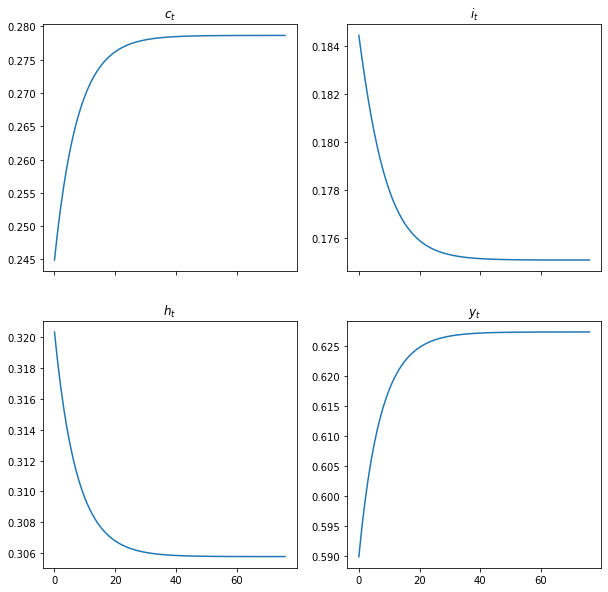

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 10))
ax[0,0].plot(paths['ct'])
ax[0,0].set_title('$c_t$')
ax[0,1].plot(paths['it'])
ax[0,1].set_title('$i_t$')
ax[1,0].plot(paths['ht'])
ax[1,0].set_title('$h_t$')
ax[1,1].plot(paths['yt'])
ax[1,1].set_title('$y_t$')

(e) Plot the dynamics of per capita, consumption, investment, labor and output per capita.

Text(0.5, 1.0, '$y_t$')

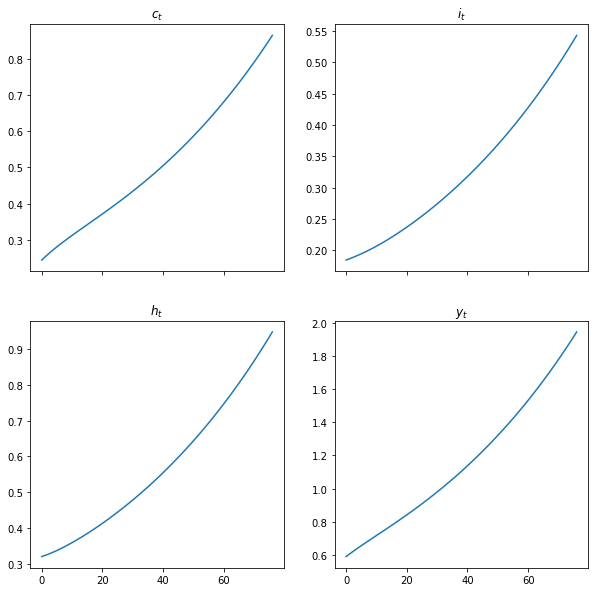

In [39]:
t = np.linspace(0, T+1, T+2)
A = 1*(1+econ2.gamma)**t
pc = dict()
for key in paths:
    pc[key] = paths[key]*A

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10, 10))
ax[0,0].plot(pc['ct'])
ax[0,0].set_title('$c_t$')
ax[0,1].plot(pc['it'])
ax[0,1].set_title('$i_t$')
ax[1,0].plot(pc['ht'])
ax[1,0].set_title('$h_t$')
ax[1,1].plot(pc['yt'])
ax[1,1].set_title('$y_t$')

(f) Now let's study the following tax reform: Suppose that the government reduces the tax on capital income from $0.15$ to $0.10$ and the government increases the $\operatorname{tax}$ on labor income in order to finance the same level of spending (i.e. in the long run the tax reform is revenue neutral). Write a program to implement this tax reform. Assume that prior the reform the initial capital stock is in the steady-state. Show the dynamics and analyze this reform. Use economic arguments to interpret your results.

In [40]:
new_tk = 0.1
g_old = ss2['gss']
new_th = econ2.get_new_tau(new_tk, g_old).x[0]
new_th

0.2714109572667154

In [41]:
param3 = param
param3['tauk'] = new_tk
param3['tauh'] = new_th
econ3 = growth2(**param3)
econ3.solve_ss()
econ3.solve_dyn(kss, T)
paths3 = econ3.get_dyn()
ss3 = econ3.get_ss()
ss3

{'hss': 0.30350517500698876,
 'css': 0.2821202706594581,
 'kss': 2.0122964933168324,
 'rss': 0.1285714285714284,
 'wss': 1.278679193109625,
 'gss': 0.17352114961299614,
 'yss': 0.6468095871375529,
 'iss': 0.1911681668650988}

Text(0.5, 1.0, '$w_t$')

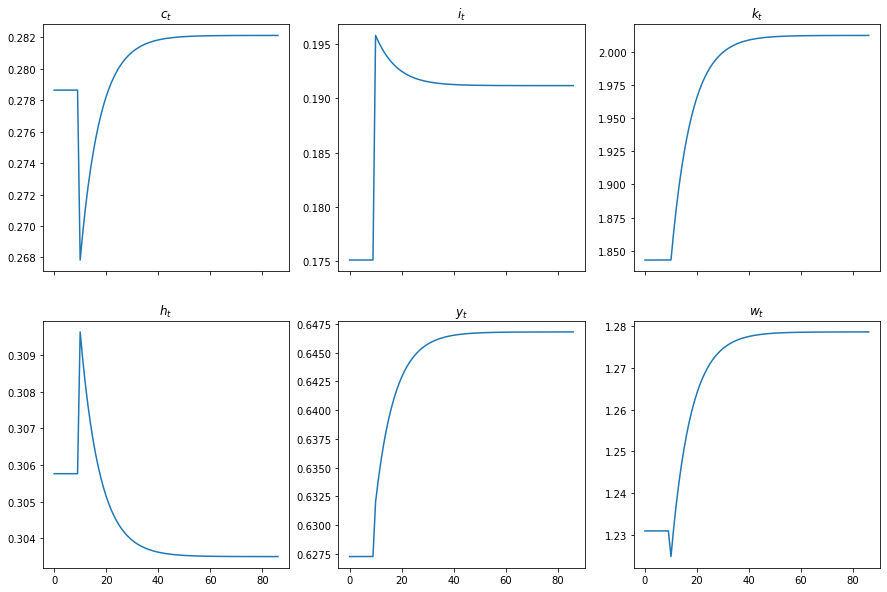

In [42]:
full_paths = dict()
for key in paths:
    full_paths[key] = np.concatenate((paths[key][-10:], paths3[key]))

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(15, 10))
ax[0,0].plot(full_paths['ct'])
ax[0,0].set_title('$c_t$')
ax[0,1].plot(full_paths['it'])
ax[0,1].set_title('$i_t$')
ax[0,2].plot(full_paths['kt'])
ax[0,2].set_title('$k_t$')
ax[1,0].plot(full_paths['ht'])
ax[1,0].set_title('$h_t$')
ax[1,1].plot(full_paths['yt'])
ax[1,1].set_title('$y_t$')
ax[1,2].plot(full_paths['wt'])
ax[1,2].set_title('$w_t$')

(g) Calculate the long run welfare implications of this tax reform in terms of consumption:
$$
\left[\ln \left((1+\omega) c^{\text {new }}\right)+\gamma \ln \left(l^{\text {new }}\right)\right]-\left[\ln \left(c^{\text {old }}\right)+\gamma \ln \left(l^{\text {old }}\right)\right]
$$
$\omega$ is the percentage of consumption that the household must be compensated (or pay) to accept this tax reform. How about the transitional dynamics? (Related to this exercise see Cavalcanti (2008). "Tributos sobre a Folha ou sobre o Faturamento? Efeitos Quantitativos Para o Brasil" RBE.)

The long run difference in welfare can be analytically computed as:

$$
\begin{equation}
1+\omega_{lr} = \frac{c^{old}(1-h^{old})^\gamma}{c^{new}(1-h^{new})^\gamma}
\end{equation}
$$

The **total** change in welfare, including the transitional dynamics is given by:

$$
\begin{equation*}
\sum_{t=0}^T\beta^t\left[\ln((1+\omega)c_t)+\gamma\ln(1-h_t)\right] + \frac{1}{1-\beta}\left[\ln((1+\omega)c^{new})+\gamma\ln(1-h^{new})\right]=\frac{1}{1-\beta}\left[\ln((1+\omega)c^{old})+\gamma\ln(1-h^{old})\right]
\end{equation*}
$$

which can be decomposed into:

$$
\begin{equation}
\ln(1+\omega)BT = \frac{1}{1-\beta}\ln(1+\omega_{lr}) + \left[\ln(c^{old})+\gamma\ln(1-h^{old})\right]\sum_{t=0}^T\beta^t - \sum_{t=0}^T\beta^t\left[\ln(c_t)+\gamma\ln(1-h_t)\right]
\end{equation}
$$

where $BT := \frac{1}{1-\beta}+\sum_{t=0}^T\beta^t$.


In [43]:
omegalr = (ss2['css']*(1-ss2['hss'])**param['theta'])/(ss3['css']*(1-ss3['hss'])**param3['theta']) -1
omegalr

-0.01870570892033241

In [44]:
def omega_obj(omega, beta, theta, T):
    t = np.arange(0, T+1)
    BT = 1/(1-beta)+np.sum(beta**t)
    sum_dyn = np.sum(beta**t*(np.log(paths3['ct'][:T+1])+theta*np.log(1-paths3['ht'][:T+1])))
    sum_old = (np.log(ss2['css'])+theta*np.log(1-ss2['hss']))*np.sum(beta**t)
    return np.log(1+omega)*BT - (1/(1-beta))*np.log(1+omegalr) + sum_dyn - sum_old

omega_sol = root(omega_obj, -0.01, args = (param['beta'], param['theta'], T), method='hybr')

In [45]:
omega_sol.x[0]

-0.013266284371218927

If we take into account only the long run results, the individual would be **willing to pay** approximately 1.87% of her final consumption in order to implement this reform (as expressed by a negative $\omega_{lr}$). When dynamics are included, the individual would still be in favor of this reform, although by a smaller margin. The transitional dynamics imposes a great deal of pain in the form of higher levels of work hours and lower consumption which partialy compensate the beneficial long run effect. 